<a href="https://colab.research.google.com/github/SantoshRajVennapu/SantoshRaju-DataAnalyst/blob/main/NewYork_KMeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [153]:
features = pd.read_excel('K-means Clustering_Copy.xlsx')
features = features[['Flat_and_Under120days','UW_Cancel','Freq_Ratio_of_Policies','Avg_$_Increase_in_CovA',
       'Max_Term','Avg_profitability','Recent_production']]
players = features.fillna(features.mean())

In [154]:
data = players.copy()

In [155]:
pd.options.display.float_format = '{:.3f}'.format
players.describe()


,Flat_and_Under120days,UW_Cancel,Freq_Ratio_of_Policies,Avg_$_Increase_in_CovA,Max_Term,Avg_profitability,Recent_production
count,1150.000,1150.000,1150.000,1150.000,1150.000,1150.000,1150.000
mean,0.230,0.130,0.164,122067.812,0.317,1326.721,0.472
std,0.209,0.162,0.161,95668.752,0.239,754.336,0.288
min,0.000,0.000,0.000,0.000,0.000,-12037.000,0.000
25%,0.111,0.026,0.069,61000.000,0.100,976.326,0.276
50%,0.191,0.096,0.143,124000.000,0.250,1326.721,0.472
75%,0.293,0.167,0.217,167583.333,0.518,1610.638,0.694
max,1.000,1.000,1.000,817000.000,0.988,6851.000,1.000


### **Scaling Avg_profititability and Avg_CovA using Minmax Scaler**

In [156]:
columns_to_scale = ['Avg_$_Increase_in_CovA', 'Avg_profitability']
data[columns_to_scale] = (data[columns_to_scale] - data[columns_to_scale].min()) / (data[columns_to_scale].max() - data[columns_to_scale].min())

data.describe()

,Flat_and_Under120days,UW_Cancel,Freq_Ratio_of_Policies,Avg_$_Increase_in_CovA,Max_Term,Avg_profitability,Recent_production
count,1150.000,1150.000,1150.000,1150.000,1150.000,1150.000,1150.000
mean,0.230,0.130,0.164,0.149,0.317,0.708,0.472
std,0.209,0.162,0.161,0.117,0.239,0.040,0.288
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.111,0.026,0.069,0.075,0.100,0.689,0.276
50%,0.191,0.096,0.143,0.152,0.250,0.708,0.472
75%,0.293,0.167,0.217,0.205,0.518,0.723,0.694
max,1.000,1.000,1.000,1.000,0.988,1.000,1.000


## **Replacing 0 values with 1e-9**

In [157]:
##data = data.replace(0, 1e-9)


In [158]:
data

,Flat_and_Under120days,UW_Cancel,Freq_Ratio_of_Policies,Avg_$_Increase_in_CovA,Max_Term,Avg_profitability,Recent_production
0,0.196,0.066,0.129,0.126,0.688,0.700,1.000
1,0.091,0.000,0.091,0.058,0.276,0.767,0.472
2,0.223,0.072,0.234,0.170,0.656,0.698,0.998
3,0.179,0.114,0.188,0.165,0.666,0.680,0.838
4,1.000,0.000,0.000,0.000,0.050,0.708,0.472
...,...,...,...,...,...,...,...
1145,0.230,0.130,0.164,0.149,0.300,0.683,0.472
1146,0.000,0.000,0.000,0.000,0.000,0.736,0.176
1147,0.000,0.000,1.000,0.149,0.000,0.725,0.176
1148,0.000,0.000,0.000,0.000,0.100,0.727,0.176


# **Data Exploration**

<Axes: title={'center': 'Scatter Plot'}, xlabel='Avg_profitability', ylabel='Avg_$_Increase_in_CovA'>

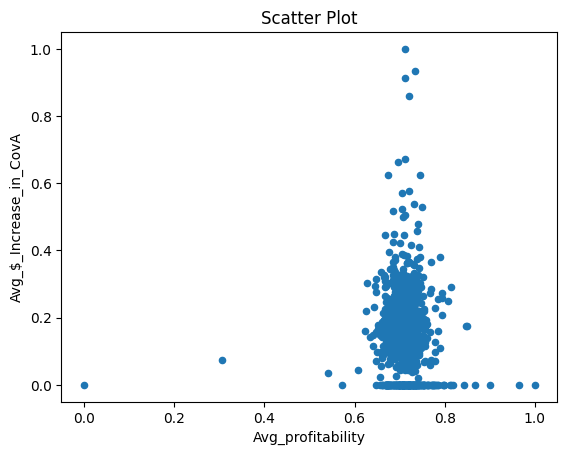

In [159]:
scatter = data.plot(kind = 'scatter', x= 'Avg_profitability',
                  y= 'Avg_$_Increase_in_CovA',
                  title = 'Scatter Plot')
scatter

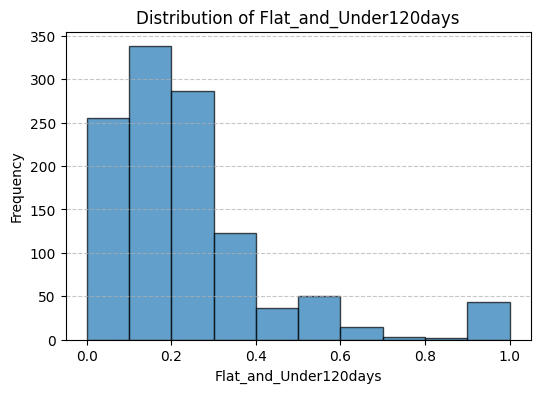

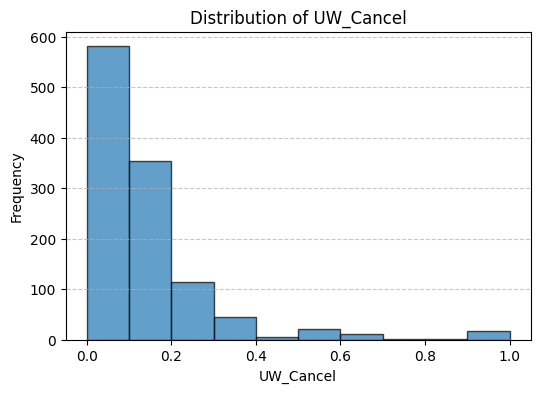

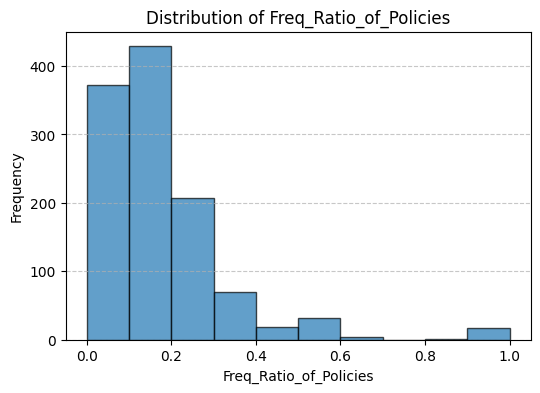

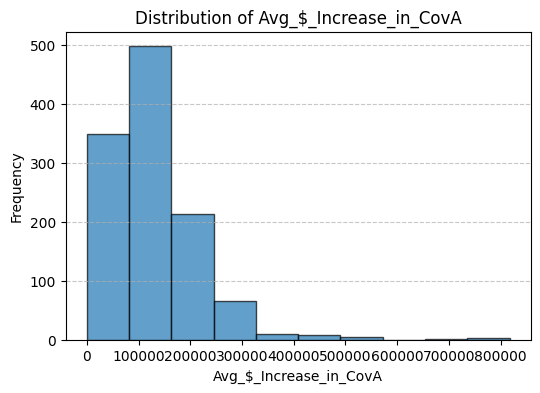

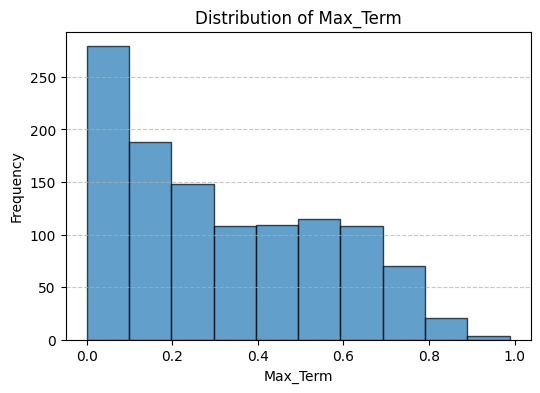

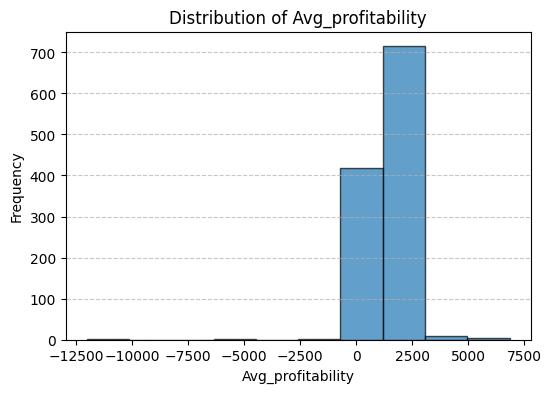

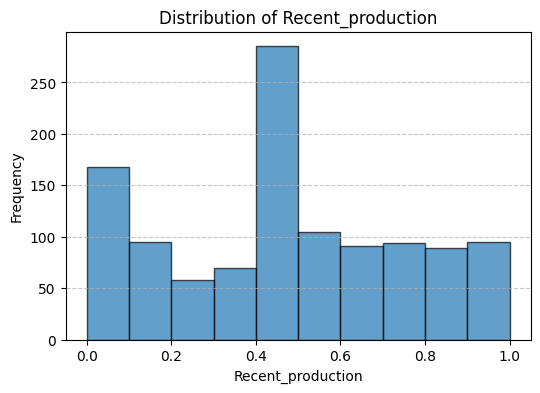

In [160]:

columns = [
    "Flat_and_Under120days", "UW_Cancel", "Freq_Ratio_of_Policies",
    "Avg_$_Increase_in_CovA", "Max_Term", "Avg_profitability", "Recent_production"
]

for column in columns:
    plt.figure(figsize=(6, 4))
    plt.hist(players[column], bins=10, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


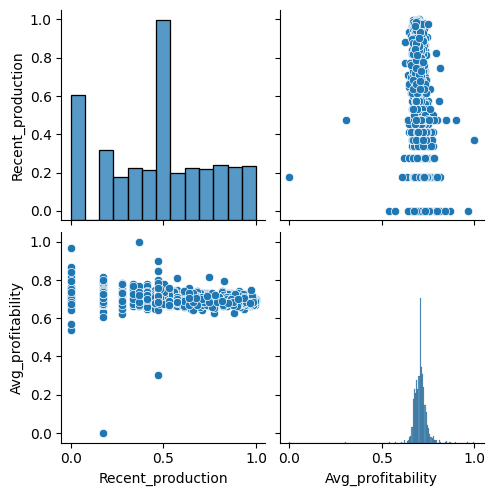

In [161]:
sns.pairplot(data,vars = ['Recent_production','Avg_profitability',])
plt.show()

In [162]:
def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x:float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)


## **Assigning Random Centroids**

In [163]:
centroids = random_centroids(data, 4)
centroids

<ipython-input-162-27b858476341>:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x:float(x.sample()))


,0,1,2,3
Flat_and_Under120days,0.167,0.086,0.187,0.236
UW_Cancel,0.000,0.226,0.131,0.229
Freq_Ratio_of_Policies,0.098,0.153,0.108,0.244
Avg_$_Increase_in_CovA,0.287,0.105,0.094,0.146
Max_Term,0.726,0.586,0.217,0.408
Avg_profitability,0.745,0.694,0.676,0.716
Recent_production,0.176,0.472,0.276,0.000


In [164]:
data

,Flat_and_Under120days,UW_Cancel,Freq_Ratio_of_Policies,Avg_$_Increase_in_CovA,Max_Term,Avg_profitability,Recent_production
0,0.196,0.066,0.129,0.126,0.688,0.700,1.000
1,0.091,0.000,0.091,0.058,0.276,0.767,0.472
2,0.223,0.072,0.234,0.170,0.656,0.698,0.998
3,0.179,0.114,0.188,0.165,0.666,0.680,0.838
4,1.000,0.000,0.000,0.000,0.050,0.708,0.472
...,...,...,...,...,...,...,...
1145,0.230,0.130,0.164,0.149,0.300,0.683,0.472
1146,0.000,0.000,0.000,0.000,0.000,0.736,0.176
1147,0.000,0.000,1.000,0.149,0.000,0.725,0.176
1148,0.000,0.000,0.000,0.000,0.100,0.727,0.176


### **Calculating Eucleadian Distance**

In [165]:
def get_labels(data,centroids):
    distances  = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)


In [166]:
labels = get_labels(data,centroids)

## **Baseline clusters Count**

In [167]:
labels.value_counts()

,count
2,563
1,389
3,149
0,49


### **Updating the centroids based on Arthimetic Mean**


In [168]:
data.groupby(labels).mean().T


,0,1,2,3
Flat_and_Under120days,0.172,0.184,0.220,0.405
UW_Cancel,0.072,0.105,0.115,0.271
Freq_Ratio_of_Policies,0.137,0.163,0.141,0.266
Avg_$_Increase_in_CovA,0.186,0.180,0.125,0.150
Max_Term,0.665,0.533,0.138,0.319
Avg_profitability,0.720,0.706,0.705,0.717
Recent_production,0.151,0.667,0.478,0.047


In [169]:
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).mean().T
    return centroids

## **Plotting in PCA**

In [170]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [171]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()


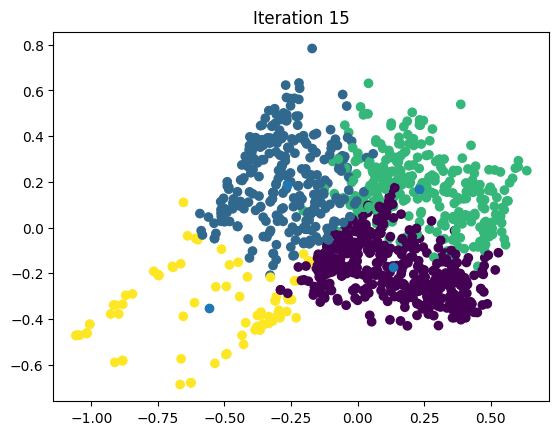

In [172]:
max_iterations = 100
centroid_count = 4

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1


In [173]:
centroids

,0,1,2,3
Flat_and_Under120days,0.161,0.208,0.190,0.787
UW_Cancel,0.096,0.099,0.103,0.493
Freq_Ratio_of_Policies,0.161,0.169,0.161,0.176
Avg_$_Increase_in_CovA,0.158,0.121,0.184,0.083
Max_Term,0.152,0.336,0.604,0.099
Avg_profitability,0.700,0.715,0.709,0.713
Recent_production,0.629,0.130,0.639,0.267


## **Cluster 0** (n = 450)
**Active Agencies with Room for Underwriting Improvement and Moderate Profitability**


1. Low flat and under 120 cancellations (7% - 23%)
2. Low Underwriting cancellations (0 - 14%)
3. Low frequency of policies bound,
4. Moderate increase in Coverage A ($),
5. Short policy terms,
6. Low to moderate profitability,
7. Moderate to High recent production.

In [192]:
players[labels ==0].describe()

,Flat_and_Under120days,UW_Cancel,Freq_Ratio_of_Policies,Avg_$_Increase_in_CovA,Max_Term,Avg_profitability,Recent_production
count,450.000,450.000,450.000,450.000,450.000,450.000,450.000
mean,0.161,0.096,0.161,129017.660,0.152,1189.927,0.629
std,0.119,0.092,0.156,101256.287,0.102,733.362,0.186
min,0.000,0.000,0.000,0.000,0.000,-6260.750,0.337
25%,0.071,0.000,0.075,71785.714,0.083,781.213,0.472
50%,0.143,0.082,0.140,129528.986,0.108,1115.500,0.598
75%,0.231,0.143,0.205,167000.000,0.227,1440.047,0.787
max,0.600,0.400,1.000,817000.000,0.400,6851.000,0.996


# **Cluster 1**
**Inactive Producers with Improved Underwriting Metrics and Moderate Profitability**

1. Moderate flat and under-120-day cancellations (7.5% to 30%)
2.  Low underwriting cancellations (0% to 16%)
3.  Low frequency of policies with Coverage A changes (0% to 25%)
4.  Moderate increases in Coverage A ($0 to $143k)
5. Moderate Policy Terms
6. Moderate profitability ($1202 to $1821)
7. Low recent production


In [195]:
players[labels ==1].describe()

,Flat_and_Under120days,UW_Cancel,Freq_Ratio_of_Policies,Avg_$_Increase_in_CovA,Max_Term,Avg_profitability,Recent_production
count,302.000,302.000,302.000,302.000,302.000,302.000,302.000
mean,0.208,0.099,0.169,99073.821,0.336,1464.946,0.130
std,0.151,0.097,0.174,101079.129,0.210,1022.330,0.130
min,0.000,0.000,0.000,0.000,0.000,-12037.000,0.000
25%,0.079,0.000,0.000,0.000,0.150,1202.950,0.000
50%,0.222,0.098,0.147,93775.000,0.342,1433.050,0.176
75%,0.325,0.167,0.250,143875.000,0.509,1821.312,0.276
max,0.545,0.375,1.000,764000.000,0.944,6183.000,0.410


# **Cluster 2**
### **Moderately Profitable Agencies with Stable Underwriting and Slightly Above-Average Production**

1.   Low flat and under-120-day cancellations
2.   Low underwriting cancellations
3.   Low frequency of policies transitioning from bound to Coverage A
4.   Moderate Coverage A increases ($117k to $182k)
5.   Above Average Policy Terms
5.  Slightly moderate profitability
6.  Above-average recent production

In [196]:
players[labels ==2].describe()

,Flat_and_Under120days,UW_Cancel,Freq_Ratio_of_Policies,Avg_$_Increase_in_CovA,Max_Term,Avg_profitability,Recent_production
count,308.000,308.000,308.000,308.000,308.000,308.000,308.000
mean,0.190,0.103,0.161,150197.577,0.604,1361.505,0.639
std,0.084,0.063,0.081,61249.436,0.130,395.098,0.195
min,0.000,0.000,0.000,0.000,0.383,88.294,0.276
25%,0.130,0.062,0.111,117068.182,0.498,1118.611,0.472
50%,0.184,0.093,0.153,144725.000,0.605,1400.564,0.598
75%,0.236,0.134,0.200,182216.270,0.703,1622.312,0.814
max,0.507,0.389,0.667,432500.000,0.988,3227.667,1.000


# **Cluster 3**

Agencies with High flat and under 120 cancellations (58.8% - 100%)
High Underwriting cancellations
Moderate Frequency of Bound to Final policies change
low to moderate Average Increase in CoverageA
Low policy Terms
Moderate profitability
Moderate recent production

In [177]:
players[labels ==3].describe()

,Flat_and_Under120days,UW_Cancel,Freq_Ratio_of_Policies,Avg_$_Increase_in_CovA,Max_Term,Avg_profitability,Recent_production
count,90.000,90.000,90.000,90.000,90.000,90.000,90.000
mean,0.787,0.493,0.176,68209.885,0.099,1427.827,0.267
std,0.216,0.323,0.292,105973.410,0.096,621.044,0.213
min,0.500,0.000,0.000,0.000,0.000,-1243.000,0.000
25%,0.588,0.250,0.000,0.000,0.050,1326.721,0.000
50%,0.775,0.500,0.000,0.000,0.050,1326.721,0.354
75%,1.000,0.667,0.318,127071.429,0.125,1461.000,0.472
max,1.000,1.000,1.000,428000.000,0.500,4332.000,0.530


# **SCIKIT IMPORTED MODEL**

In [178]:
from sklearn.cluster import KMeans

In [179]:
kmeans = KMeans(4)
kmeans.fit(data)

KMeans(n_clusters=4)

In [180]:
data.describe()

,Flat_and_Under120days,UW_Cancel,Freq_Ratio_of_Policies,Avg_$_Increase_in_CovA,Max_Term,Avg_profitability,Recent_production
count,1150.000,1150.000,1150.000,1150.000,1150.000,1150.000,1150.000
mean,0.230,0.130,0.164,0.149,0.317,0.708,0.472
std,0.209,0.162,0.161,0.117,0.239,0.040,0.288
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.111,0.026,0.069,0.075,0.100,0.689,0.276
50%,0.191,0.096,0.143,0.152,0.250,0.708,0.472
75%,0.293,0.167,0.217,0.205,0.518,0.723,0.694
max,1.000,1.000,1.000,1.000,0.988,1.000,1.000


In [181]:
pd.DataFrame(kmeans.cluster_centers_, columns=data.columns).T

,0,1,2,3
Flat_and_Under120days,0.159,0.222,0.162,0.766
UW_Cancel,0.094,0.118,0.083,0.479
Freq_Ratio_of_Policies,0.147,0.174,0.168,0.178
Avg_$_Increase_in_CovA,0.203,0.166,0.102,0.088
Max_Term,0.312,0.563,0.148,0.108
Avg_profitability,0.693,0.717,0.710,0.713
Recent_production,0.815,0.333,0.344,0.255


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


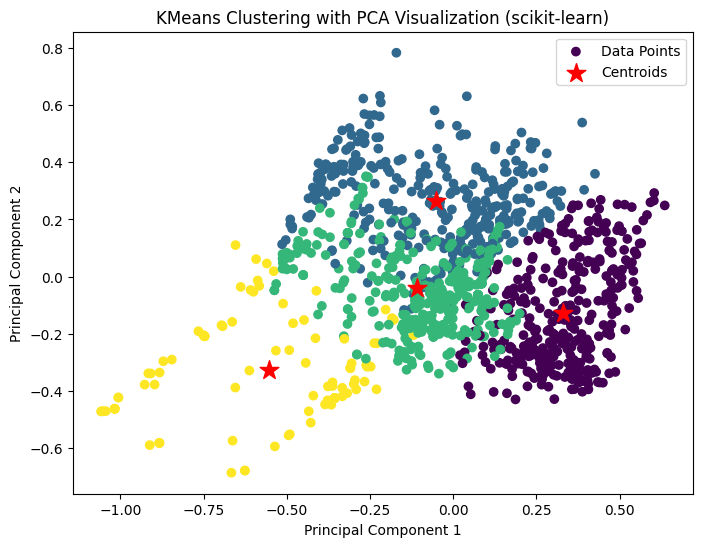

In [182]:
# prompt: write script to visualze data in PCA from kmeans model of scikit

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Get cluster labels
labels_sklearn = kmeans.labels_

# PCA for visualization
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)
centroids_2d = pca.transform(kmeans.cluster_centers_)

# Plot the clusters with scikit-learn results
plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels_sklearn, cmap='viridis', label='Data Points')
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], s=200, c='red', marker='*', label='Centroids')
plt.title('KMeans Clustering with PCA Visualization (scikit-learn)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [183]:
# prompt: give me code to list all datapoints from kmeans with respect to each cluster in dataframe to identify datapoint and its cluster

import pandas as pd

# Assuming 'data' and 'labels_sklearn' are defined from your previous code
# Create a DataFrame with data points and their assigned clusters
clustered_data = pd.DataFrame(data)
clustered_data['Cluster'] = labels_sklearn

# Display the DataFrame
print(clustered_data)

      Flat_and_Under120days  UW_Cancel  Freq_Ratio_of_Policies  \
0                     0.196      0.066                   0.129   
1                     0.091      0.000                   0.091   
2                     0.223      0.072                   0.234   
3                     0.179      0.114                   0.188   
4                     1.000      0.000                   0.000   
...                     ...        ...                     ...   
1145                  0.230      0.130                   0.164   
1146                  0.000      0.000                   0.000   
1147                  0.000      0.000                   1.000   
1148                  0.000      0.000                   0.000   
1149                  0.500      0.250                   0.000   

      Avg_$_Increase_in_CovA  Max_Term  Avg_profitability  Recent_production  \
0                      0.126     0.688              0.700              1.000   
1                      0.058     0.276         

In [184]:
print(f"Data points in cluster 0:")
clustered_data[clustered_data['Cluster'] == 0].describe()

Data points in cluster 0:


,Flat_and_Under120days,UW_Cancel,Freq_Ratio_of_Policies,Avg_$_Increase_in_CovA,Max_Term,Avg_profitability,Recent_production,Cluster
count,338.000,338.000,338.000,338.000,338.000,338.000,338.000,338.000
mean,0.159,0.094,0.147,0.203,0.312,0.693,0.815,0.000
std,0.077,0.059,0.062,0.095,0.237,0.023,0.112,0.000
min,0.000,0.000,0.000,0.000,0.000,0.625,0.503,0.000
25%,0.108,0.053,0.108,0.158,0.090,0.677,0.723,0.000
50%,0.150,0.083,0.143,0.184,0.237,0.691,0.822,0.000
75%,0.200,0.126,0.183,0.227,0.512,0.709,0.910,0.000
max,0.429,0.371,0.425,1.000,0.951,0.814,1.000,0.000


In [185]:
print(f"Data points in cluster 1:")
clustered_data[clustered_data['Cluster'] == 1]

Data points in cluster 1:


,Flat_and_Under120days,UW_Cancel,Freq_Ratio_of_Policies,Avg_$_Increase_in_CovA,Max_Term,Avg_profitability,Recent_production,Cluster
5,0.250,0.083,0.083,0.152,0.705,0.729,0.709,1
6,0.349,0.127,0.349,0.226,0.524,0.707,0.000,1
8,0.372,0.128,0.149,0.131,0.465,0.709,0.000,1
12,0.200,0.100,0.233,0.220,0.504,0.679,0.472,1
14,0.333,0.267,0.133,0.274,0.388,0.733,0.472,1
...,...,...,...,...,...,...,...,...
917,0.167,0.083,0.083,0.020,0.423,0.740,0.370,1
956,0.125,0.062,0.188,0.220,0.450,0.718,0.410,1
986,0.333,0.333,0.667,0.176,0.300,0.708,0.000,1
1032,0.000,0.000,0.000,0.000,0.450,0.722,0.472,1


In [186]:
print(f"Data points in cluster 2:")
clustered_data[clustered_data['Cluster'] == 2]

Data points in cluster 2:


,Flat_and_Under120days,UW_Cancel,Freq_Ratio_of_Policies,Avg_$_Increase_in_CovA,Max_Term,Avg_profitability,Recent_production,Cluster
1,0.091,0.000,0.091,0.058,0.276,0.767,0.472,2
9,0.333,0.167,0.000,0.000,0.183,0.742,0.472,2
25,0.500,0.000,0.000,0.000,0.150,0.708,0.472,2
27,0.500,0.000,0.000,0.000,0.050,0.736,0.472,2
71,0.148,0.037,0.222,0.127,0.356,0.723,0.472,2
...,...,...,...,...,...,...,...,...
1144,0.000,0.000,1.000,0.623,0.000,0.745,0.176,2
1145,0.230,0.130,0.164,0.149,0.300,0.683,0.472,2
1146,0.000,0.000,0.000,0.000,0.000,0.736,0.176,2
1147,0.000,0.000,1.000,0.149,0.000,0.725,0.176,2


In [187]:
print(f"Data points in cluster 3:")
clustered_data[clustered_data['Cluster'] == 3]

Data points in cluster 3:


,Flat_and_Under120days,UW_Cancel,Freq_Ratio_of_Policies,Avg_$_Increase_in_CovA,Max_Term,Avg_profitability,Recent_production,Cluster
4,1.000,0.000,0.000,0.000,0.050,0.708,0.472,3
10,0.750,0.750,0.000,0.000,0.200,0.708,0.472,3
26,0.750,0.250,0.000,0.000,0.050,0.708,0.472,3
43,0.500,0.250,0.000,0.000,0.100,0.723,0.176,3
50,1.000,0.000,0.000,0.000,0.050,0.708,0.472,3
...,...,...,...,...,...,...,...,...
1096,1.000,0.667,0.333,0.109,0.000,0.708,0.337,3
1105,1.000,0.000,0.000,0.000,0.000,0.708,0.176,3
1135,0.500,0.500,0.000,0.000,0.075,0.571,0.000,3
1138,0.667,0.667,0.000,0.000,0.000,0.799,0.176,3
